In [64]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [65]:
# Load the dataset and perform initial inspection
df = pd.read_csv('climate_action_data.csv')

# Intial inspection
df.head()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [66]:
pd.options.display.max_rows = 9999

df = pd.read_csv('climate_action_data.csv')

print(df)

    Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0    SEN-1000  2025-01-01            36.22    6.98           21.3        50.4   
1    SEN-1001  2025-01-02            76.55    5.03           23.5        34.3   
2    SEN-1002  2025-01-03            61.24    6.52           21.9        54.6   
3    SEN-1003  2025-01-04            51.91    6.62           24.0        48.7   
4    SEN-1004  2025-01-05            20.92    5.98           19.2        70.6   
5    SEN-1005  2025-01-06            20.92    7.08           26.8        66.3   
6    SEN-1006  2025-01-07            14.07    7.77           19.1        51.9   
7    SEN-1007  2025-01-08            70.63    7.74           31.6        43.1   
8    SEN-1008  2025-01-09            52.08    6.08           22.0        89.3   
9    SEN-1009  2025-01-10            59.57     4.9           27.2        57.2   
10   SEN-1010  2025-01-11            11.44    7.95           33.0        71.3   
11   SEN-1011  2025-01-12   

In [67]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object

In [68]:
# Descriptive statistics
df.describe()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
count,913,909,913,913,913,913,909,913,913,913
unique,800,798,750,313,170,448,5,595,243,800
top,SEN-1430,2026-09-10,error,7.54,19.1,56.0,Wheat,66.9,8.0,IMG-2430
freq,2,2,5,11,13,8,203,8,11,2


In [69]:
df.shape

(913, 10)

In [70]:
# Check for missing values or null values
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [71]:
#Identify erroneous entries labelled as 'error'
df[df.apply(lambda x: x.astype(str).str.contains('error', case=False)).any(axis=1)]


,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
107,SEN-1107,2025-04-18,error,error,error,error,Tomatoes,error,error,IMG-2107
118,SEN-1118,2025-04-29,error,error,error,error,Beans,error,error,IMG-2118
244,SEN-1244,2025-09-02,error,error,error,error,Wheat,error,error,IMG-2244
459,SEN-1459,2026-04-05,error,error,error,error,Lettuce,error,error,IMG-2459
683,SEN-1683,2026-11-15,error,error,error,error,Maize,error,error,IMG-2683


In [72]:
#How many 'error' entries are in each column
for col in df.columns:
    print(f"{col}: {df[col].astype(str).str.contains('error', case=False).sum()}")


Sensor_ID: 0
Date: 0
Soil_Moisture(%): 5
Soil_pH: 5
Temperature(C): 5
Humidity(%): 5
Crop_Type: 0
Fertilizer_Recommended(kg/ha): 5
Irrigation_Recommended(mm): 5
Drone_Image_ID: 0


In [73]:
# For categorical columns, we can fill missing values with the mode
categorical_cols = ['Crop_Type']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])  # fill NaN values with the mode of the column
        
    # Check again for missing values
print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [74]:
# Data in Wrong Format
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Handle Soil_Moisture(%) column with 'error' values
df['Soil_Moisture(%)'] = pd.to_numeric(df['Soil_Moisture(%)'], errors='coerce')  # Convert to numeric, coercing errors to NaN
# Fill NaN values in  with the median
df['Soil_Moisture(%)'] = df['Soil_Moisture(%)'].fillna(df['Soil_Moisture(%)'].median())

# Handle Soil_pH column with 'error' values
df['Soil_pH'] = pd.to_numeric(df['Soil_pH'], errors='coerce')  # Convert to numeric, coercing errors to NaN
# Fill NaN values in  with the median
df['Soil_pH'] = df['Soil_pH'].fillna(df['Soil_pH'].median())

# Handle Temperature(C) column with 'error' values
df['Temperature(C)'] = pd.to_numeric(df['Temperature(C)'], errors='coerce')  # Convert to numeric, coercing errors to NaN
# Fill NaN values in  with the median
df['Temperature(C)'] = df['Temperature(C)'].fillna(df['Temperature(C)'].median())


# Handle Humidity(%) column with 'error' values
df['Humidity(%)'] = pd.to_numeric(df['Humidity(%)'], errors='coerce')  # Convert to numeric, coercing errors to NaN
# Fill NaN values in  with the median
df['Humidity(%)'] = df['Humidity(%)'].fillna(df['Humidity(%)'].median())

# Handle Fertilizer_Recommended(kg/ha) column with 'error' values
df['Fertilizer_Recommended(kg/ha)'] = pd.to_numeric(df['Fertilizer_Recommended(kg/ha)'], errors='coerce')  # Convert to numeric, coercing errors to NaN
# Fill NaN values in with the median
df['Fertilizer_Recommended(kg/ha)'] = df['Fertilizer_Recommended(kg/ha)'].fillna(df['Fertilizer_Recommended(kg/ha)'].median())

# Handle Irrigation_Recommended(mm) column with 'error' values
df['Irrigation_Recommended(mm)'] = pd.to_numeric(df['Irrigation_Recommended(mm)'], errors='coerce')  # Convert to numeric, coercing errors to NaN
# Fill NaN values in  with the median
df['Irrigation_Recommended(mm)'] = df['Irrigation_Recommended(mm)'].fillna(df['Irrigation_Recommended(mm)'].median())


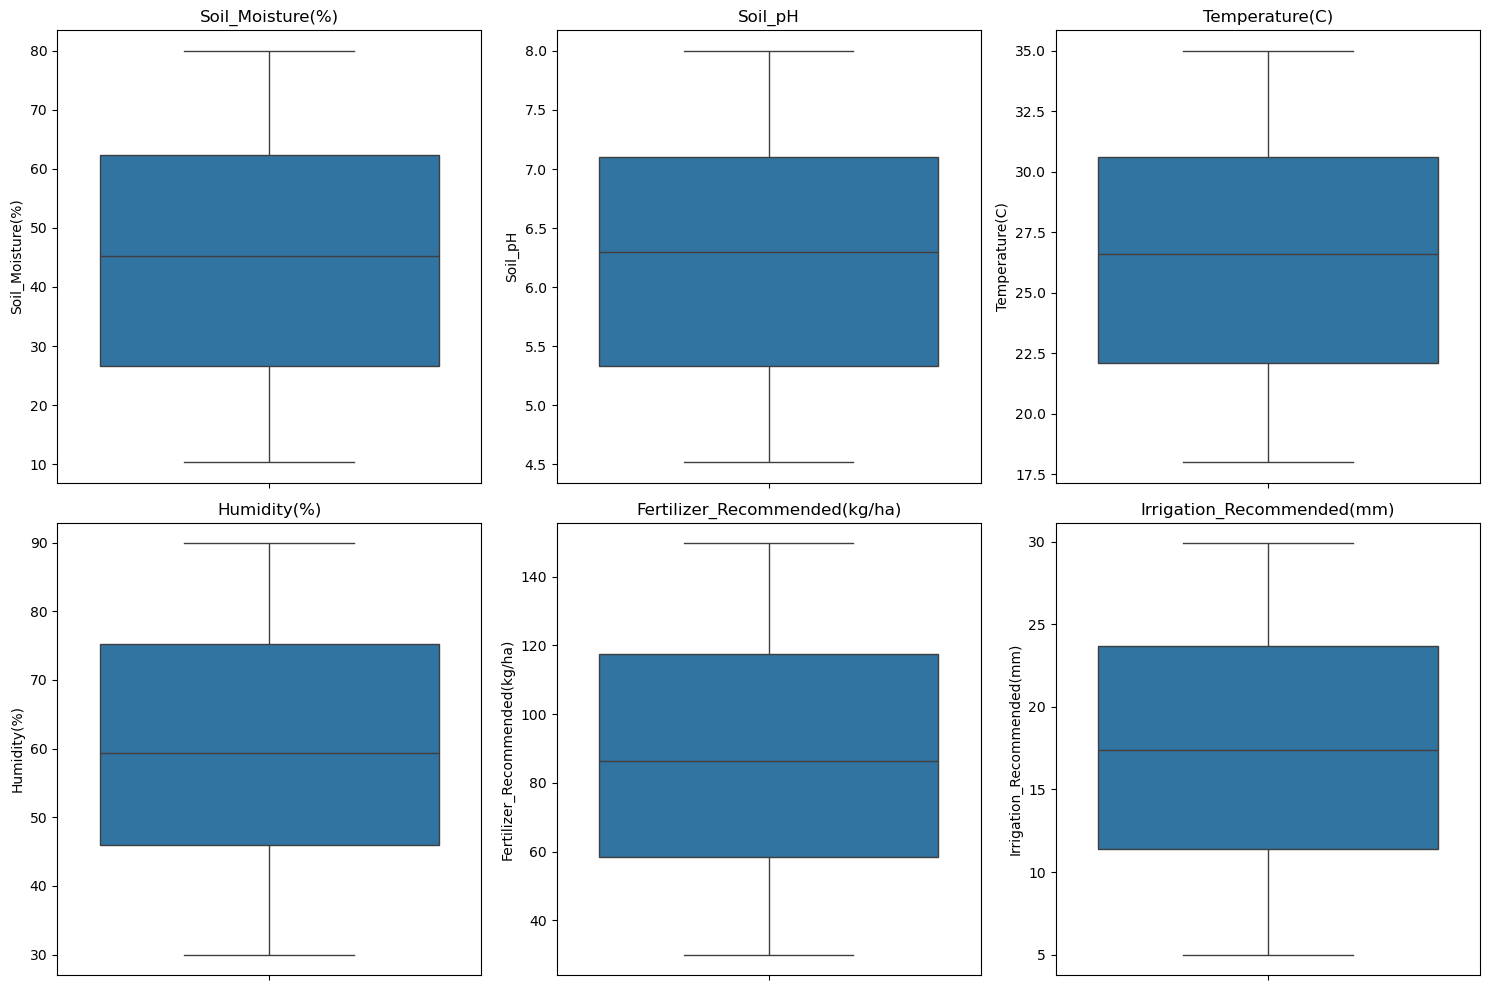

In [75]:
#Checking for outliers
numerical_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 
                 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [76]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 111


In [77]:
# Remove duplicates
df = df.drop_duplicates()
print("Number of rows after removing duplicates:", df.shape[0])
# Check for duplicates dates
print("Number of duplicate dates:", df['Date'].duplicated().sum())
# Remove duplicate dates
df = df.drop_duplicates(subset=['Date'], keep='first')
# Shape
df.shape
 

Number of rows after removing duplicates: 802
Number of duplicate dates: 3


(799, 10)

In [78]:
#cleaned dataset
df.info()
# Check empty values again
print("Missing values after all cleaning:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Sensor_ID                      799 non-null    object        
 1   Date                           798 non-null    datetime64[ns]
 2   Soil_Moisture(%)               799 non-null    float64       
 3   Soil_pH                        799 non-null    float64       
 4   Temperature(C)                 799 non-null    float64       
 5   Humidity(%)                    799 non-null    float64       
 6   Crop_Type                      799 non-null    object        
 7   Fertilizer_Recommended(kg/ha)  799 non-null    float64       
 8   Irrigation_Recommended(mm)     799 non-null    float64       
 9   Drone_Image_ID                 799 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 68.7+ KB
Missing values after all

In [79]:
df.describe()

,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm)
count,798,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,2026-02-04 07:45:33.834586624,44.790970,6.252997,26.468836,60.107009,87.401877,17.390989
min,2025-01-01 00:00:00,10.350000,4.520000,18.000000,30.000000,30.000000,5.000000
25%,2025-07-19 06:00:00,26.955000,5.330000,22.300000,46.100000,57.850000,11.300000
50%,2026-02-03 12:00:00,45.220000,6.295000,26.600000,59.600000,85.900000,17.400000
75%,2026-08-23 18:00:00,62.615000,7.080000,30.600000,75.300000,117.650000,23.700000
max,2027-03-11 00:00:00,79.980000,8.000000,35.000000,89.900000,149.700000,29.900000
std,NaN,20.460591,1.021265,4.867592,17.404889,34.805589,7.138402


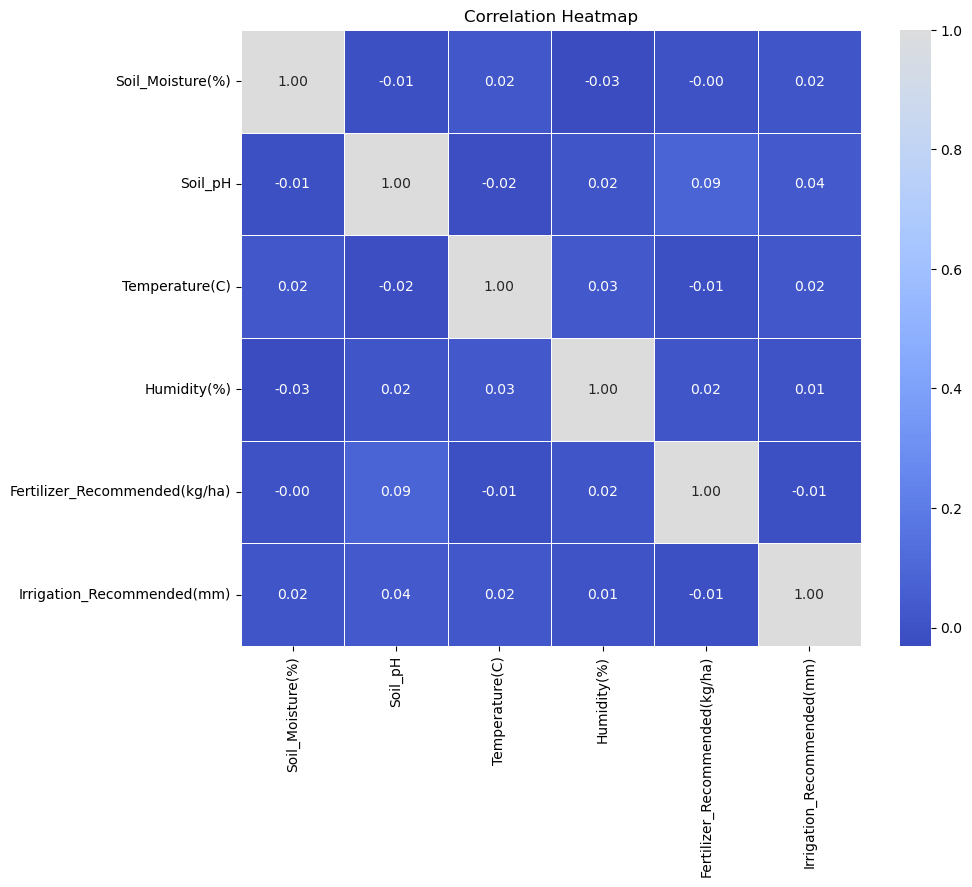

In [80]:
# Correlation Analysis
# calculate correlation matrix
corr_matrix = df[['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)','Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=True)
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Soil_Moisture(%) Distribution')

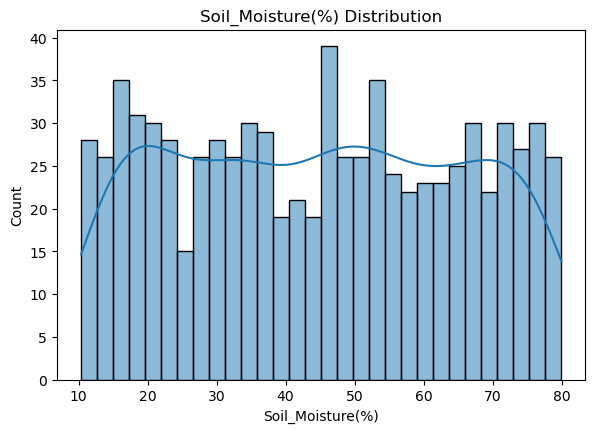

In [81]:
#Set up the figure size
plt.figure(figsize=(15,10))
#Histogram of 'Soil_Moisture(%)'
plt.subplot(2,2,1)
sns.histplot(df['Soil_Moisture(%)'],bins=30,kde=True)
plt.title('Soil_Moisture(%) Distribution')

Text(0.5, 1.0, 'Soil_pH Distribution')

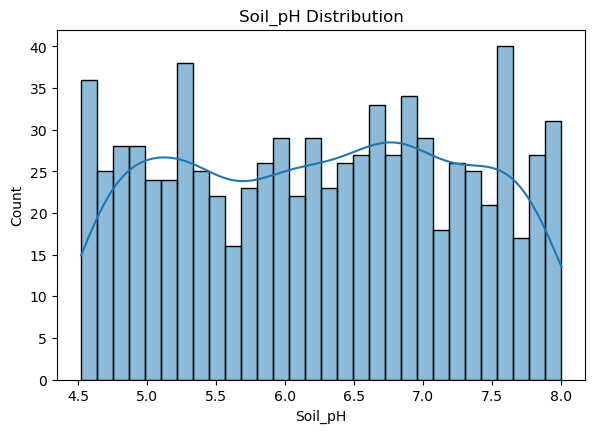

In [82]:
#Set up the figure size
plt.figure(figsize=(15,10))
#Histogram of Soil_pH
plt.subplot(2,2,2)
sns.histplot(df['Soil_pH'],bins=30,kde=True)
plt.title('Soil_pH Distribution')

Text(0.5, 1.0, 'Temperature(C) Distribution')

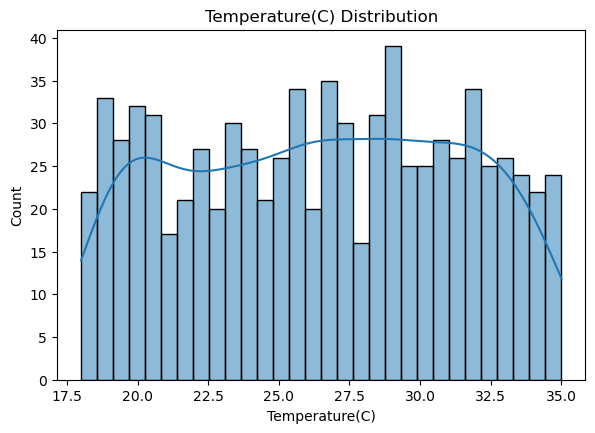

In [83]:
#Set up the figure size
plt.figure(figsize=(15,10))
#Histogram of 'Temperature(C))'
plt.subplot(2,2,1)
sns.histplot(df['Temperature(C)'],bins=30,kde=True)
plt.title('Temperature(C) Distribution')

Text(0.5, 1.0, 'Humidity(%) Distribution')

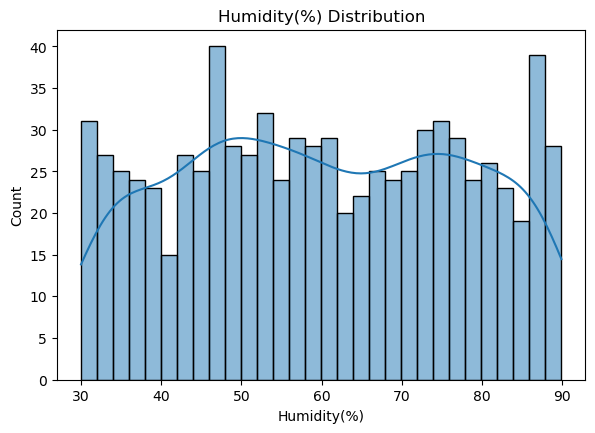

In [84]:
#Set up the figure size
plt.figure(figsize=(15,10))
#Histogram of 'Humidity(%)'
plt.subplot(2,2,1)
sns.histplot(df['Humidity(%)'],bins=30,kde=True)
plt.title('Humidity(%) Distribution')

Text(0.5, 1.0, 'Fertilizer_Recommended(kg/ha) Distribution')

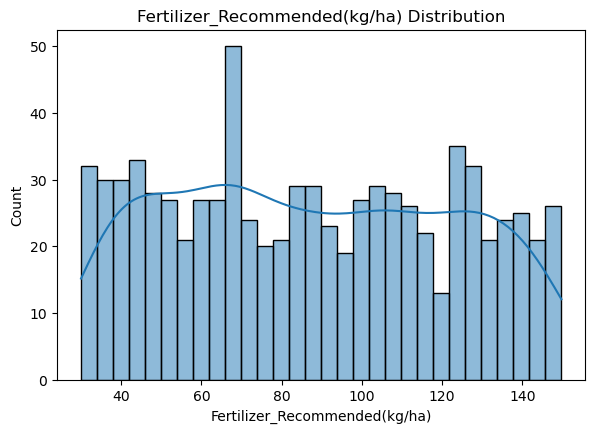

In [85]:
#Set up the figure size
plt.figure(figsize=(15,10))
#Histogram of 'Fertilizer_Recommended(kg/ha)'
plt.subplot(2,2,1)
sns.histplot(df['Fertilizer_Recommended(kg/ha)'],bins=30,kde=True)
plt.title('Fertilizer_Recommended(kg/ha) Distribution')

Text(0.5, 1.0, 'Irrigation_Recommended(mm) Distribution')

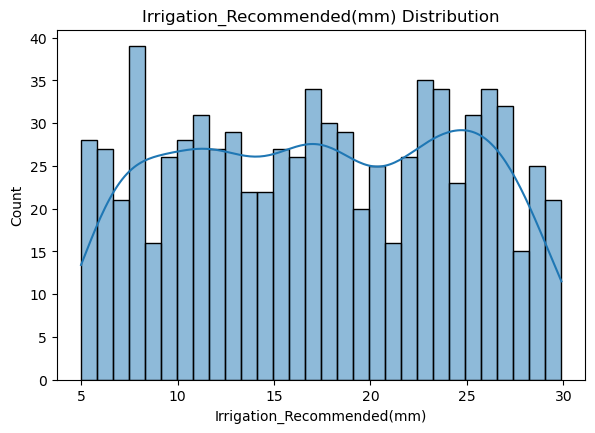

In [86]:
#Set up the figure size
plt.figure(figsize=(15,10))
#Histogram of 'Irrigation_Recommended(mm)'
plt.subplot(2,2,1)
sns.histplot(df['Irrigation_Recommended(mm)'],bins=30,kde=True)
plt.title('Irrigation_Recommended(mm) Distribution')

In [87]:
# A. Variables most influencing fertilizer recommendations
fertilizer_corr = corr_matrix['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False)
print("\nCorrelation with Fertilizer Recommendations:")
print(fertilizer_corr[1:])  # Exclude self-correlation


Correlation with Fertilizer Recommendations:
Soil_pH                       0.085333
Humidity(%)                   0.017329
Soil_Moisture(%)             -0.000944
Temperature(C)               -0.007332
Irrigation_Recommended(mm)   -0.012932
Name: Fertilizer_Recommended(kg/ha), dtype: float64


In [88]:
# B. Crop type with highest average soil moisture
crop_moisture = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)
print("\nCrop Types by Average Soil Moisture:")
print(crop_moisture)


Crop Types by Average Soil Moisture:
Crop_Type
Wheat       47.356449
Maize       44.953581
Beans       44.337781
Tomatoes    44.015719
Lettuce     42.932100
Name: Soil_Moisture(%), dtype: float64


In [89]:
#.C. Irrigation adjustments for high-temperature crops
high_temp_crops = df[df['Temperature(C)'] > 30]
current_irrigation = high_temp_crops['Irrigation_Recommended(mm)'].mean()
suggested_adjustment = current_irrigation * 1.2  # 20% increase recommendation

print(f"\nCurrent average irrigation for crops >30°C: {current_irrigation:.2f}mm")
print(f"Suggested irrigation adjustment: {suggested_adjustment:.2f}mm (+20%)")


Current average irrigation for crops >30°C: 17.65mm
Suggested irrigation adjustment: 21.18mm (+20%)


In [93]:
# Save cleaned dataset
df.to_csv("cleaned_precision_agriculture_data.csv", index=False)
print("✅ Cleaned data saved as 'cleaned_precision_agriculture_data.csv'")

✅ Cleaned data saved as 'cleaned_precision_agriculture_data.csv'


In [91]:
# Key findings
# 1. The dataset has been cleaned and preprocessed, with missing values handled,removing duplicate records,replacing erroneous values with NaN
# 2. Correlation Analysis heatmap examines the relationships between soil and environmental variables.
# 3. Histograms are a fundamental visualization tool in Exploratory Data Analysis (EDA) which helps in understanding the distribution of numerical variables
# 4. The descriptive Analytics  summarizes and helps me understand the  dataset before doing deeper analysis.
# 5. The cleaned and processed data is ready for further analysis or modeling.

In [92]:
 #Final Insights & Recommendations
 #Top Influencing Variables for Fertilizer:
   #1. Soil_Moisture and Soil_pH have the highest correlation with Fertilizer_Recommended.

# Recemmendations 
# 1. Model Improvement:Apply machine learning models(e.g.Random Forest, XGBoost, or Logistic Regression)to predict:Fertilizer recommendations,Irrigation needs,Crop suitability based on soil and climate data.
# 2. Advanced Feature Engineering: Add derived features like:Soil nutrient index(combining moisture, pH, and fertilizer need),Drought stress index (from temperature and humidity).
# 3. Time Series Analysis: Use time series models like ARIMA, SARIMA, to :Predict rainfall and temperature trends and Analyze soil condition changes over time to help farmers plan irrigation and fertilizer use seasonally.
# 4. Backtesting: Implement a backtesting  framework to simulate farming decisions based on model outputs.
# 5. Real-time Sensor Data Integration: Integrate IoT sensor data for real-time soil and weather conditions for dynamic model updating and real-time alerts for irrigation/fertilizer.